* [데이터 다운로드](https://www.data.go.kr/data/15070337/fileData.do)

In [ ]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from datetime import datetime 
from statsmodels.tsa.seasonal import seasonal_decompose

# 한글 깨짐
plt.rc('font', family='NanumBarunGothic') 

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

In [8]:
# read excel file
df = pd.read_excel('/content/drive/MyDrive/data/도로교통공단_일자별 시군구별 교통사고 건수.xlsx')

In [9]:
df.head()

,발생월,발생일,시도,시군구,사고건수,사망자수,중상자수,경상자수,부상신고자수
0,1,1,서울,종로구,1,0,0,1,0
1,1,1,서울,중구,1,0,0,2,0
2,1,1,서울,용산구,2,0,0,5,0
3,1,1,서울,성동구,1,0,0,1,0
4,1,1,서울,동대문구,3,0,1,2,0


In [ ]:
df

In [10]:
# date format 변경
a = range(0, 59724)
b = range(0, 59724)

df['dt'] = pd.DataFrame(list(map(lambda x, y: '2020-'+ str(df['발생월'][x]) + '-' + str(df['발생일'][y]), a, b)))
df['ym'] = pd.DataFrame(list(map(lambda x: '2020-'+ str(df['발생월'][x]), a)))

df

,발생월,발생일,시도,시군구,사고건수,사망자수,중상자수,경상자수,부상신고자수,dt,ym
0,1,1,서울,종로구,1,0,0,1,0,2020-1-1,2020-1
1,1,1,서울,중구,1,0,0,2,0,2020-1-1,2020-1
2,1,1,서울,용산구,2,0,0,5,0,2020-1-1,2020-1
3,1,1,서울,성동구,1,0,0,1,0,2020-1-1,2020-1
4,1,1,서울,동대문구,3,0,1,2,0,2020-1-1,2020-1
...,...,...,...,...,...,...,...,...,...,...,...
59719,12,31,울산,중구,1,0,0,1,0,2020-12-31,2020-12
59720,12,31,울산,남구,1,0,1,0,0,2020-12-31,2020-12
59721,12,31,울산,북구,3,0,2,3,1,2020-12-31,2020-12
59722,12,31,울산,울주군,4,0,2,3,0,2020-12-31,2020-12


In [11]:
df['dt']  = df['dt'].map(lambda x : datetime.strptime(x, '%Y-%m-%d').strftime('%Y-%m-%d'))
df['ym']  = df['ym'].map(lambda x : datetime.strptime(x, '%Y-%m').strftime('%Y-%m'))
df.head(3)

,발생월,발생일,시도,시군구,사고건수,사망자수,중상자수,경상자수,부상신고자수,dt,ym
0,1,1,서울,종로구,1,0,0,1,0,2020-01-01,2020-01
1,1,1,서울,중구,1,0,0,2,0,2020-01-01,2020-01
2,1,1,서울,용산구,2,0,0,5,0,2020-01-01,2020-01


In [12]:
# 기초 통계
df.describe()

,발생월,발생일,사고건수,사망자수,중상자수,경상자수,부상신고자수
count,59724.000000,59724.000000,59724.000000,59724.000000,59724.000000,59724.000000,59724.000000
mean,6.554400,15.795710,3.510381,0.051587,1.014065,3.784676,0.328076
std,3.420461,8.786796,3.008699,0.237546,1.258949,3.903219,0.766818
min,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,4.000000,8.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,7.000000,16.000000,3.000000,0.000000,1.000000,3.000000,0.000000
75%,10.000000,23.000000,5.000000,0.000000,1.000000,5.000000,0.000000
max,12.000000,31.000000,31.000000,5.000000,15.000000,46.000000,29.000000


In [13]:
# 시도 별로 데이터 집계
sido_df = df.groupby(['dt', 'ym', '시도']).agg({
    '사고건수':'sum',
    '사망자수':'sum',
    '중상자수':'sum',
    '경상자수':'sum',
}).reset_index()

In [14]:
sido_df

,dt,ym,시도,사고건수,사망자수,중상자수,경상자수
0,2020-01-01,2020-01,강원,25,0,5,47
1,2020-01-01,2020-01,경기,95,3,39,124
2,2020-01-01,2020-01,경남,18,1,10,21
3,2020-01-01,2020-01,경북,24,1,7,30
4,2020-01-01,2020-01,광주,13,0,0,12
...,...,...,...,...,...,...,...
6176,2020-12-31,2020-12,전남,18,0,6,19
6177,2020-12-31,2020-12,전북,9,0,6,4
6178,2020-12-31,2020-12,제주,7,0,1,6
6179,2020-12-31,2020-12,충남,23,0,8,23


In [15]:
# 일자별 시도의 사고건수
sido_df.pivot_table(index='dt', columns='시도', values='사고건수', aggfunc='sum')

시도,강원,경기,경남,경북,광주,대구,대전,부산,서울,세종,울산,인천,전남,전북,제주,충남,충북
dt,,,,,,,,,,,,,,,,,
2020-01-01,25.0,95.0,18.0,24.0,13.0,20.0,10.0,23.0,53.0,1.0,3.0,16.0,13.0,7.0,7.0,12.0,12.0
2020-01-02,23.0,123.0,26.0,28.0,24.0,28.0,23.0,26.0,95.0,4.0,12.0,17.0,26.0,23.0,16.0,25.0,25.0
2020-01-03,24.0,163.0,33.0,26.0,22.0,48.0,21.0,36.0,79.0,1.0,13.0,21.0,31.0,22.0,11.0,22.0,24.0
2020-01-04,24.0,118.0,30.0,20.0,17.0,35.0,21.0,29.0,78.0,1.0,9.0,27.0,23.0,13.0,15.0,24.0,23.0
2020-01-05,17.0,109.0,22.0,24.0,14.0,23.0,19.0,22.0,68.0,3.0,8.0,12.0,23.0,12.0,5.0,11.0,14.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-27,8.0,68.0,20.0,21.0,14.0,19.0,6.0,25.0,40.0,1.0,4.0,17.0,20.0,7.0,7.0,15.0,8.0
2020-12-28,17.0,132.0,33.0,40.0,18.0,42.0,8.0,37.0,81.0,3.0,8.0,26.0,29.0,12.0,4.0,23.0,24.0
2020-12-29,15.0,105.0,32.0,29.0,20.0,27.0,10.0,37.0,71.0,1.0,8.0,21.0,25.0,16.0,9.0,19.0,11.0


In [16]:
# 월별 시도의 사고건수
sido_pivot = sido_df.pivot_table(index='ym', columns='시도', values='사고건수', aggfunc='sum')
sido_pivot

시도,강원,경기,경남,경북,광주,대구,대전,부산,서울,세종,울산,인천,전남,전북,제주,충남,충북
ym,,,,,,,,,,,,,,,,,
2020-01,617,4081,928,1030,673,1102,566,1022,2788,73,333,635,836,573,349,714,648
2020-02,501,4213,819,858,596,917,600,925,2999,66,286,783,709,482,282,619,630
2020-03,478,3730,883,801,595,778,535,870,2561,74,293,610,764,489,305,586,597
2020-04,505,4129,915,959,620,975,593,933,2724,46,307,647,705,511,269,651,697
2020-05,618,4522,992,1097,673,1129,638,1039,3139,62,299,748,874,544,325,786,699
2020-06,684,4673,1149,1181,723,1151,644,1045,3189,61,334,721,963,580,337,827,755
2020-07,630,4645,987,1138,577,1170,636,1055,3162,57,320,763,764,553,370,754,721
2020-08,627,4142,1064,1140,642,1136,564,1029,2926,51,339,715,831,537,386,766,721
2020-09,629,4504,986,1086,633,1215,624,954,2991,94,309,711,869,579,352,829,759


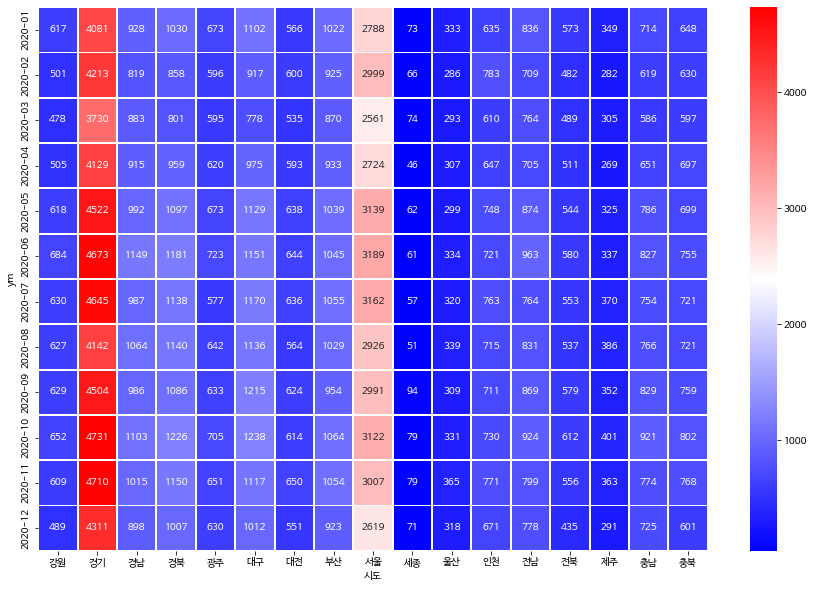

In [17]:
# heatmap
plt.figure(figsize=(15, 10))
ax = sns.heatmap(sido_pivot, annot=True, fmt='d', linewidths = 1, cmap='bwr')

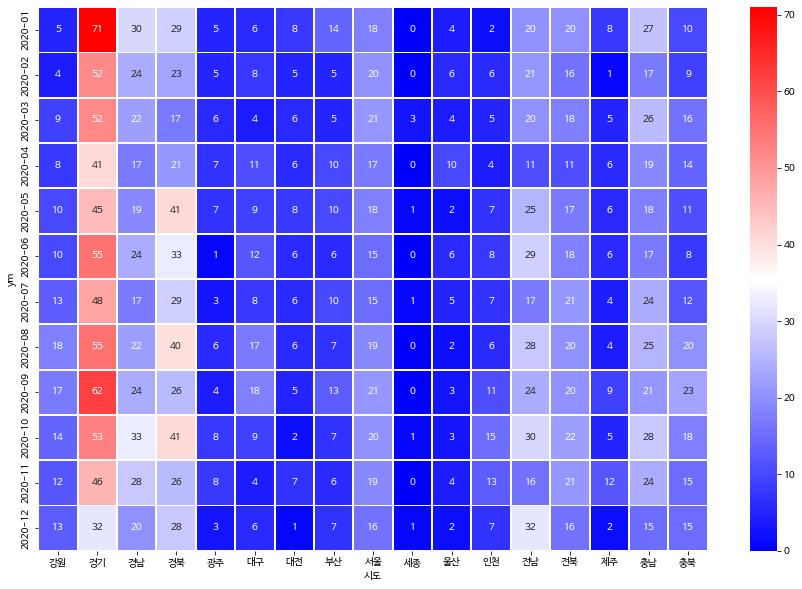

In [18]:
# 시도별 사망자수 heatmap
sido_pivot = sido_df.pivot_table(index='ym', columns='시도', values='사망자수', aggfunc='sum')
plt.figure(figsize=(15, 10))
ax = sns.heatmap(sido_pivot, annot=True, fmt='d', linewidths = 1, cmap='bwr')

In [19]:
# 심각도 계산을 위한 데이터집계
tmp_sido_df = sido_df.groupby(['ym', '시도']).agg({
    '사망자수' : 'sum',
    '사고건수' : 'sum',
}).reset_index()

tmp_sido_df.head()


,ym,시도,사망자수,사고건수
0,2020-01,강원,5,617
1,2020-01,경기,71,4081
2,2020-01,경남,30,928
3,2020-01,경북,29,1030
4,2020-01,광주,5,673


In [20]:
# 심각도 계산
tmp_sido_df['심각도'] = tmp_sido_df['사망자수']/tmp_sido_df['사고건수'] * 100
tmp_sido_df.head()

,ym,시도,사망자수,사고건수,심각도
0,2020-01,강원,5,617,0.810373
1,2020-01,경기,71,4081,1.739770
2,2020-01,경남,30,928,3.232759
3,2020-01,경북,29,1030,2.815534
4,2020-01,광주,5,673,0.742942


In [21]:
5/617

0.008103727714748784

In [22]:
tmp_sido_df['심각도'] = round(tmp_sido_df['심각도'], 1)

In [23]:
tmp_sido_df.sort_values(by='심각도', ascending=False)

,ym,시도,사망자수,사고건수,심각도
49,2020-03,충남,26,586,4.4
43,2020-03,세종,3,74,4.1
199,2020-12,전남,32,778,4.1
183,2020-11,전북,21,556,3.8
15,2020-01,충남,27,714,3.8
...,...,...,...,...,...
128,2020-08,세종,0,51,0.0
60,2020-04,세종,0,46,0.0
94,2020-06,세종,0,61,0.0
145,2020-09,세종,0,94,0.0


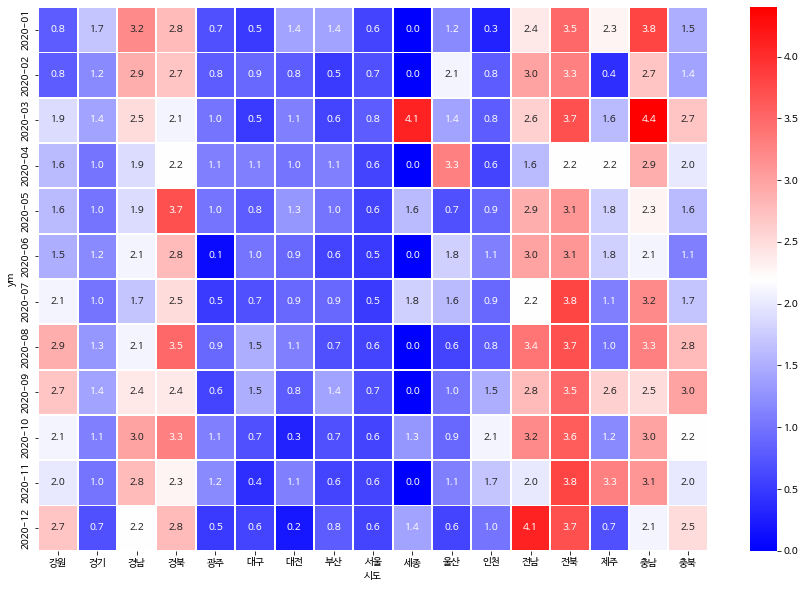

In [24]:
tmp_heat_df = tmp_sido_df.pivot_table(index='ym', columns='시도', values='심각도', aggfunc='sum')

plt.figure(figsize=(15, 10))
ax = sns.heatmap(tmp_heat_df, annot=True, fmt='.1f', linewidths = 1, cmap='bwr')

In [25]:
jb_df = tmp_sido_df[tmp_sido_df['시도'] == '전북']
jb_df.head()

,ym,시도,사망자수,사고건수,심각도
13,2020-01,전북,20,573,3.5
30,2020-02,전북,16,482,3.3
47,2020-03,전북,18,489,3.7
64,2020-04,전북,11,511,2.2
81,2020-05,전북,17,544,3.1


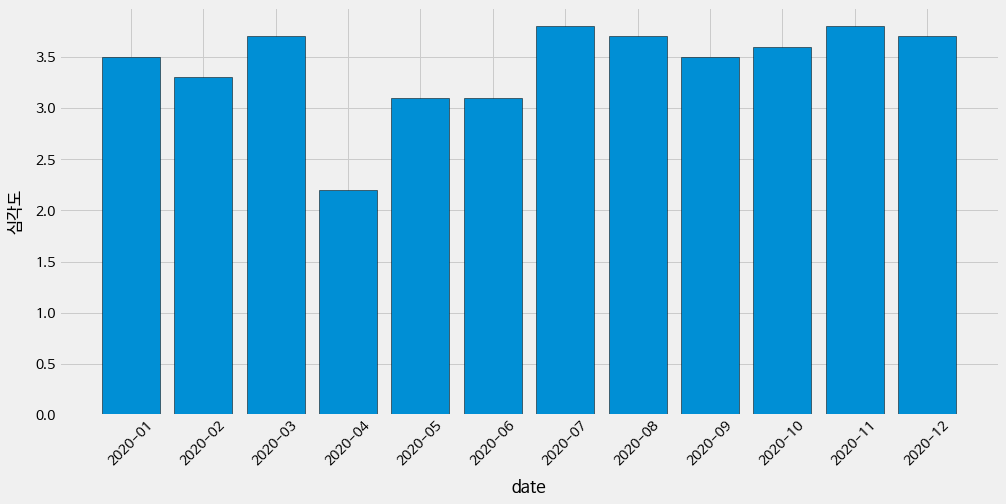

In [26]:
# 전북의 월별 심각도
plt.style.use('fivethirtyeight')

plt.figure(figsize=(15,7))
plt.bar(jb_df['ym'], jb_df['심각도'], width=0.8, edgecolor='black')

plt.xlabel('date', labelpad=10)
plt.ylabel('심각도', labelpad=10)

plt.xticks(rotation=45)

plt.show()

In [27]:
# 심각도가 높다고 판단되는 세 도시
bar_df = tmp_sido_df.loc[tmp_sido_df['시도'].isin(['전북', '경북', '충남'])][['ym', '시도', '심각도']]
bar_df.head()

,ym,시도,심각도
3,2020-01,경북,2.8
13,2020-01,전북,3.5
15,2020-01,충남,3.8
20,2020-02,경북,2.7
30,2020-02,전북,3.3


In [28]:
bar_plot_df = bar_df.pivot_table(index='ym', columns='시도', values='심각도', aggfunc='sum')

In [29]:
bar_plot_df

시도,경북,전북,충남
ym,,,
2020-01,2.8,3.5,3.8
2020-02,2.7,3.3,2.7
2020-03,2.1,3.7,4.4
2020-04,2.2,2.2,2.9
2020-05,3.7,3.1,2.3
2020-06,2.8,3.1,2.1
2020-07,2.5,3.8,3.2
2020-08,3.5,3.7,3.3
2020-09,2.4,3.5,2.5


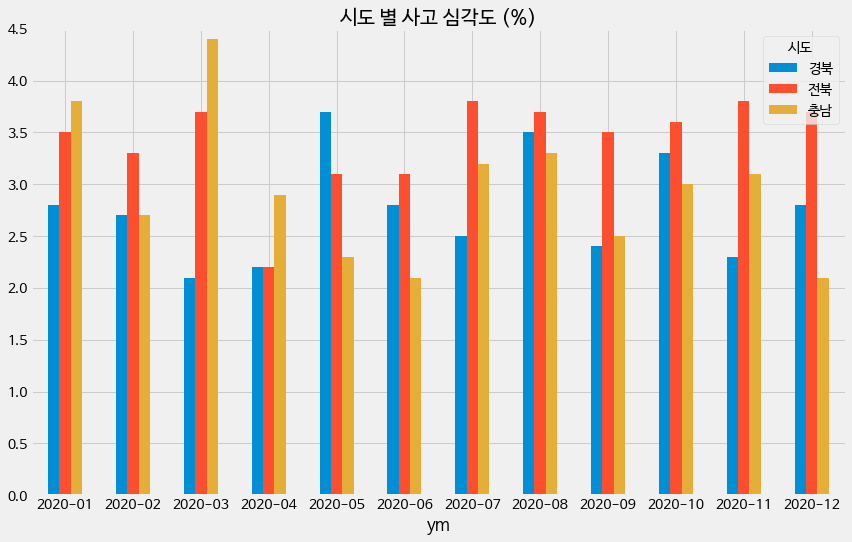

In [31]:
plt.style.use('fivethirtyeight')
ax = bar_plot_df.plot(kind='bar', rot=0, figsize=(13,8), ylim=[0, 4.5], title='시도 별 사고 심각도 (%)')

In [36]:
sido_df = df.groupby(['dt', 'ym', '시도']).agg({
    '사고건수':'sum',
    '사망자수':'sum',
    '중상자수':'sum',
    '경상자수':'sum',
}).reset_index()

In [37]:
sido_df['심각도'] = sido_df['사망자수']/sido_df['사고건수'] * 100
sido_df.head()

,dt,ym,시도,사고건수,사망자수,중상자수,경상자수,심각도
0,2020-01-01,2020-01,강원,25,0,5,47,0.000000
1,2020-01-01,2020-01,경기,95,3,39,124,3.157895
2,2020-01-01,2020-01,경남,18,1,10,21,5.555556
3,2020-01-01,2020-01,경북,24,1,7,30,4.166667
4,2020-01-01,2020-01,광주,13,0,0,12,0.000000


In [38]:
jb_df = sido_df[sido_df['시도'] == '전북']
jb_df = jb_df[['dt', '사고건수', '심각도']]

In [39]:
jb_df

,dt,사고건수,심각도
13,2020-01-01,7,0.000000
30,2020-01-02,23,0.000000
47,2020-01-03,22,0.000000
64,2020-01-04,13,0.000000
81,2020-01-05,12,0.000000
...,...,...,...
6109,2020-12-27,7,0.000000
6126,2020-12-28,12,8.333333
6143,2020-12-29,16,0.000000
6160,2020-12-30,20,0.000000


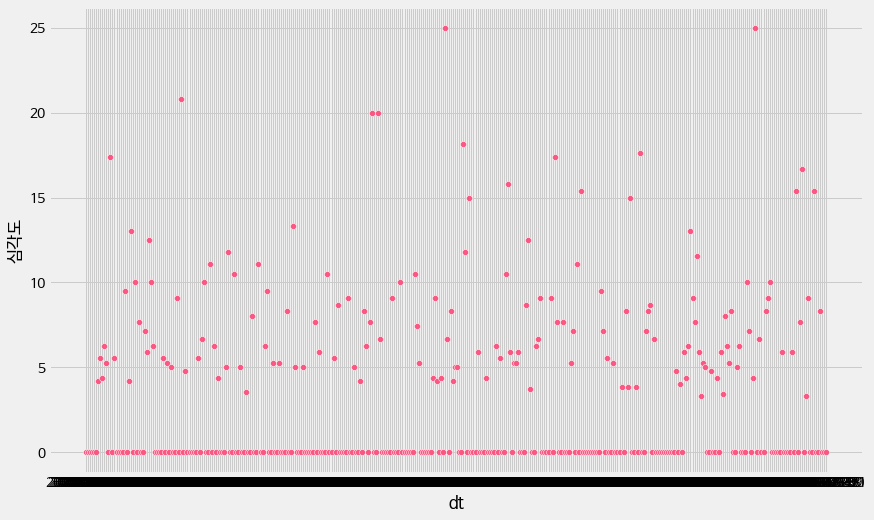

In [40]:
# 전북의 일자별 심각도 Scatter plot
plt.figure(figsize=(13, 8))
sns.set_palette(['#FA5882'])
sns.scatterplot(data=jb_df, x='dt', y='심각도')

In [41]:
jb_df.columns = ['dt', 'cnt', 'rate']

In [42]:
jb_df

,dt,cnt,rate
13,2020-01-01,7,0.000000
30,2020-01-02,23,0.000000
47,2020-01-03,22,0.000000
64,2020-01-04,13,0.000000
81,2020-01-05,12,0.000000
...,...,...,...
6109,2020-12-27,7,0.000000
6126,2020-12-28,12,8.333333
6143,2020-12-29,16,0.000000
6160,2020-12-30,20,0.000000


In [45]:
jb_df

,cnt,rate
dt,,
2020-01-01,7,0.000000
2020-01-02,23,0.000000
2020-01-03,22,0.000000
2020-01-04,13,0.000000
2020-01-05,12,0.000000
...,...,...
2020-12-27,7,0.000000
2020-12-28,12,8.333333
2020-12-29,16,0.000000


In [44]:
# 전북의 심각도 시계열 분해
import statsmodels.api as sm

jb_df['dt'] = pd.to_datetime(jb_df['dt'])
jb_df.set_index('dt', inplace=True)
result = sm.tsa.seasonal_decompose(jb_df.rate)

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


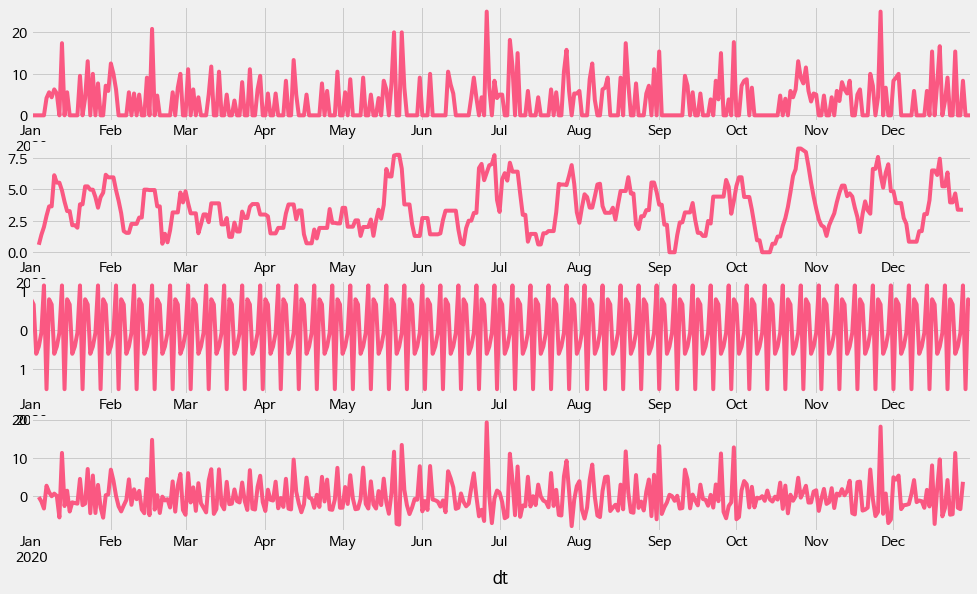

In [46]:
fig,(ax1,ax2,ax3,ax4) = plt.subplots(4,1, figsize=(15,9))
result.observed.plot(ax=ax1)
result.trend.plot(ax=ax2)
result.seasonal.plot(ax=ax3)
result.resid.plot(ax=ax4)

In [47]:
tmp_sido_df.head()

,ym,시도,사망자수,사고건수,심각도
0,2020-01,강원,5,617,0.8
1,2020-01,경기,71,4081,1.7
2,2020-01,경남,30,928,3.2
3,2020-01,경북,29,1030,2.8
4,2020-01,광주,5,673,0.7


In [48]:
tmp_sido_df.groupby('시도').사고건수.sum()

시도
강원     7039
경기    52391
경남    11739
경북    12673
광주     7718
대구    12940
대전     7215
부산    11913
서울    35227
세종      813
울산     3834
인천     8505
전남     9816
전북     6451
제주     4030
충남     8952
충북     8398
Name: 사고건수, dtype: int64

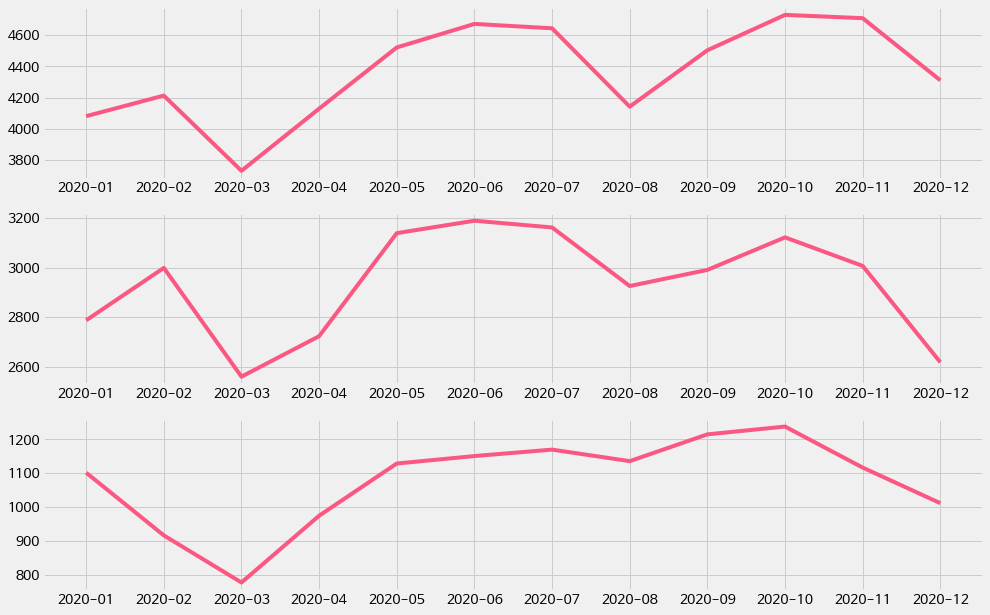

In [49]:
plt.figure(figsize=(15, 10))

plt.subplot(311)
plt.plot(tmp_sido_df[tmp_sido_df['시도'] == '경기']['ym'], tmp_sido_df[tmp_sido_df['시도'] == '경기']['사고건수'])

plt.subplot(312)
plt.plot(tmp_sido_df[tmp_sido_df['시도'] == '서울']['ym'], tmp_sido_df[tmp_sido_df['시도'] == '서울']['사고건수'])

plt.subplot(313)
plt.plot(tmp_sido_df[tmp_sido_df['시도'] == '경북']['ym'], tmp_sido_df[tmp_sido_df['시도'] == '대구']['사고건수'])

plt.show()

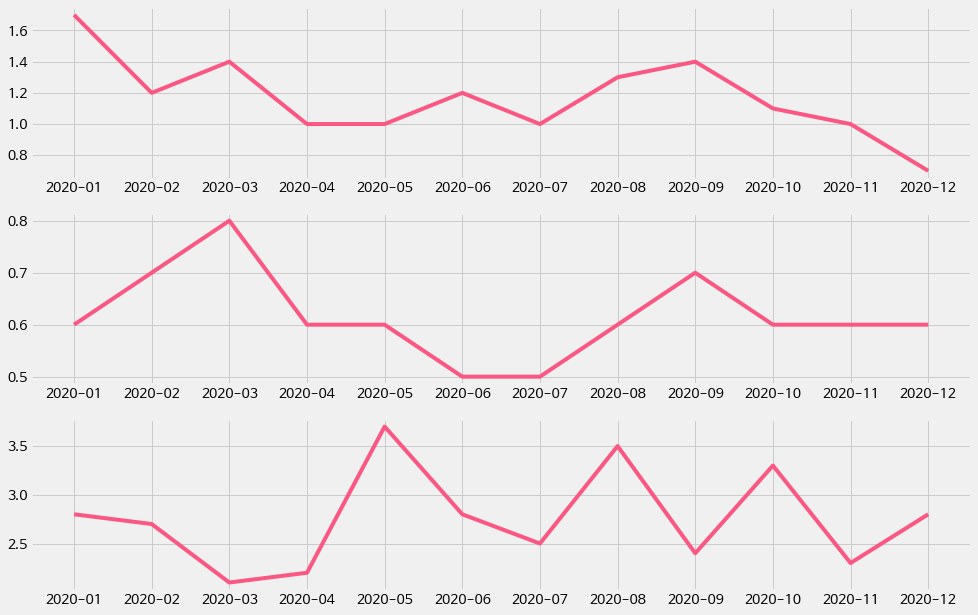

In [50]:
plt.figure(figsize=(15, 10))

plt.subplot(311)
plt.plot(tmp_sido_df[tmp_sido_df['시도'] == '경기']['ym'], tmp_sido_df[tmp_sido_df['시도'] == '경기']['심각도'])

plt.subplot(312)
plt.plot(tmp_sido_df[tmp_sido_df['시도'] == '서울']['ym'], tmp_sido_df[tmp_sido_df['시도'] == '서울']['심각도'])

plt.subplot(313)
plt.plot(tmp_sido_df[tmp_sido_df['시도'] == '경북']['ym'], tmp_sido_df[tmp_sido_df['시도'] == '경북']['심각도'])

plt.show()